    #1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [3]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [4]:
#check datatype
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
#shape
df.shape

(5000, 14)

In [6]:
#null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
#statistical summary
df.describe().transpose()

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [8]:
## Incorrect imputation check

# Age : is between 23 and 67 - All good
# Experience : is between -3 and 43 - Experince can't be negative - Incorrect imputation
# Income : is between 8 and 224 - All good
# Family : is between 1 and 4 - All good
# CCAvg : is between 0 and 10 - All good

In [9]:
#Experience is negative - which is incorrect - 52 employees have negative experince
df[~df['Experience'].gt(-1)]['Experience'].count()

52

In [10]:
#All records with negative Experience
df[~df['Experience'].gt(-1)]

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
89      90   25          -1     113     94303       4   2.30          3   
226    227   24          -1      39     94085       2   1.70          2   
315    316   24          -2      51     90630       3   0.30          3   
451    452   28          -2      48     94132       2   1.75          3   
524    525   24          -1      75     93014       4   0.20          1   
536    537   25          -1      43     92173       3   2.40          2   
540    541   25          -1     109     94010       4   2.30          3   
576    577   25          -1      48     92870       3   0.30          3   
583    584   24          -1      38     95045       2   1.70          2   
597    598   24          -2     125     92835       2   7.20          1   
649    650   25          -1      82     92677       4   2.10          3   
670    671   23          -1      61     92374       4   2.60          1   
686    687   24          -1      38     92612       4   0.60          2   
793    794   24          -2     150     94720       2   2.00          1   
889    890   24          -2      82     91103       2   1.60          3   
909    910   23          -1     149     91709       1   6.33          1   
1173  1174   24          -1      35     94305       2   1.70          2   
1428  1429   25          -1      21     94583       4   0.40          1   
1522  1523   25          -1     101     94720       4   2.30          3   
1905  1906   25          -1     112     92507       2   2.00          1   
2102  2103   25          -1      81     92647       2   1.60          3   
2430  2431   23          -1      73     92120       4   2.60          1   
2466  2467   24          -2      80     94105       2   1.60          3   
2545  2546   25          -1      39     94720       3   2.40          2   
2618  2619   23          -3      55     92704       3   2.40          2   
2717  2718   23          -2      45     95422       4   0.60          2   
2848  2849   24          -1      78     94720       2   1.80          2   
2876  2877   24          -2      80     91107       2   1.60          3   
2962  2963   23          -2      81     91711       2   1.80          2   
2980  2981   25          -1      53     94305       3   2.40          2   
3076  3077   29          -1      62     92672       2   1.75          3   
3130  3131   23          -2      82     92152       2   1.80          2   
3157  3158   23          -1      13     94720       4   1.00          1   
3279  3280   26          -1      44     94901       1   2.00          2   
3284  3285   25          -1     101     95819       4   2.10          3   
3292  3293   25          -1      13     95616       4   0.40          1   
3394  3395   25          -1     113     90089       4   2.10          3   
3425  3426   23          -1      12     91605       4   1.00          1   
3626  3627   24          -3      28     90089       4   1.00          3   
3796  3797   24          -2      50     94920       3   2.40          2   
3824  3825   23          -1      12     95064       4   1.00          1   
3887  3888   24          -2     118     92634       2   7.20          1   
3946  3947   25          -1      40     93117       3   2.40          2   
4015  4016   25          -1     139     93106       2   2.00          1   
4088  4089   29          -1      71     94801       2   1.75          3   
4116  4117   24          -2     135     90065       2   7.20          1   
4285  4286   23          -3     149     93555       2   7.20          1   
4411  4412   23          -2      75     90291       2   1.80          2   
4481  4482   25          -2      35     95045       4   1.00          3   
4514  4515   24          -3      41     91768       4   1.00          3   
4582  4583   25          -1      69     92691       3   0.30          3   
4957  4958   29          -1      50     95842       2   1.75          3   

      Mortgage  Personal Loan  S

In [11]:
#Experince is not gretaher than Age - All good
df[df['Experience'].gt(df['Age'])]

Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []

#2 EDA

In [12]:
#Number of unique in each column
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [13]:
#Number of people with zero mortgage
print('Number of people with zero mortgage :',df[~df['Mortgage'].gt(0)]['Mortgage'].count())


Number of people with zero mortgage : 3462


In [14]:
#Number of people with zero credit card spending per month
print('Number of people with zero credit card spending per month :',df[~df['CCAvg'].gt(0)]['CCAvg'].count())

Number of people with zero credit card spending per month : 106


In [15]:
#Value counts of all categorical columns
#Education is a categorical columns
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [16]:
# dropping ID as it will be 1-1 mapping anyways
cr_df = df.drop('ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
cr_df.head()

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49     91107       4    1.6          1         0   
1   45          19      34     90089       3    1.5          1         0   
2   39          15      11     94720       1    1.0          1         0   
3   35           9     100     94112       1    2.7          2         0   
4   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

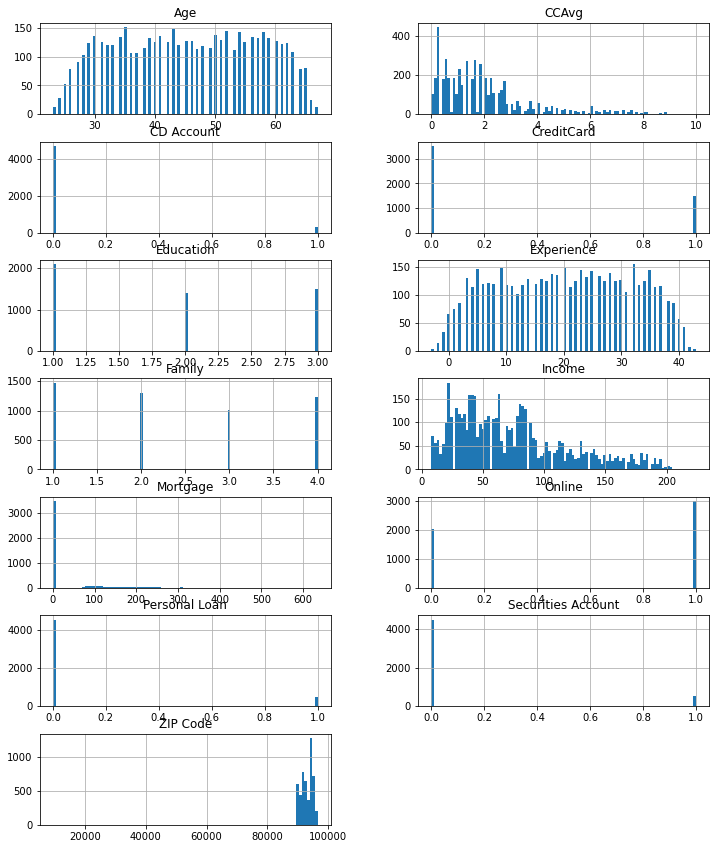

In [17]:
#Univariate
cr_df.hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

In [18]:
#Bivariate
cr_df.corr()

#Age and Expience have highest correlation - 0.99

Age  Experience    Income  ZIP Code    Family  \
Age                 1.000000    0.994215 -0.055269 -0.029216 -0.046418   
Experience          0.994215    1.000000 -0.046574 -0.028626 -0.052563   
Income             -0.055269   -0.046574  1.000000 -0.016410 -0.157501   
ZIP Code           -0.029216   -0.028626 -0.016410  1.000000  0.011778   
Family             -0.046418   -0.052563 -0.157501  0.011778  1.000000   
CCAvg              -0.052012   -0.050077  0.645984 -0.004061 -0.109275   
Education           0.041334    0.013152 -0.187524 -0.017377  0.064929   
Mortgage           -0.012539   -0.010582  0.206806  0.007383 -0.020445   
Personal Loan      -0.007726   -0.007413  0.502462  0.000107  0.061367   
Securities Account -0.000436   -0.001232 -0.002616  0.004704  0.019994   
CD Account          0.008043    0.010353  0.169738  0.019972  0.014110   
Online              0.013702    0.013898  0.014206  0.016990  0.010354   
CreditCard          0.007681    0.008967 -0.002385  0.007691  0.011588   

                       CCAvg  Education  Mortgage  Personal Loan  \
Age                -0.052012   0.041334 -0.012539      -0.007726   
Experience         -0.050077   0.013152 -0.010582      -0.007413   
Income              0.645984  -0.187524  0.206806       0.502462   
ZIP Code           -0.004061  -0.017377  0.007383       0.000107   
Family             -0.109275   0.064929 -0.020445       0.061367   
CCAvg               1.000000  -0.136124  0.109905       0.366889   
Education          -0.136124   1.000000 -0.033327       0.136722   
Mortgage            0.109905  -0.033327  1.000000       0.142095   
Personal Loan       0.366889   0.136722  0.142095       1.000000   
Securities Account  0.015086  -0.010812 -0.005411       0.021954   
CD Account          0.136534   0.013934  0.089311       0.316355   
Online             -0.003611  -0.015004 -0.005995       0.006278   
CreditCard         -0.006689  -0.011014 -0.007231       0.002802   

                    Securities Account  CD Account    Online  CreditCard  
Age                          -0.000436    0.008043  0.013702    0.007681  
Experience                   -0.001232    0.010353  0.013898    0.008967  
Income                       -0.002616    0.169738  0.014206   -0.002385  
ZIP Code                      0.004704    0.019972  0.016990    0.007691  
Family                        0.019994    0.014110  0.010354    0.011588  
CCAvg                         0.015086    0.136534 -0.003611   -0.006689  
Education                    -0.010812    0.013934 -0.015004   -0.011014  
Mortgage                     -0.005411    0.089311 -0.005995   -0.007231  
Personal Loan                 0.021954    0.316355  0.006278    0.002802  
Securities Account            1.000000    0.317034  0.012627   -0.015028  
CD Account                    0.317034    1.000000  0.175880    0.278644  
Online                        0.012627    0.175880  1.000000    0.004210  
CreditCard                   -0.015028    0.278644  0.004210    1.000000

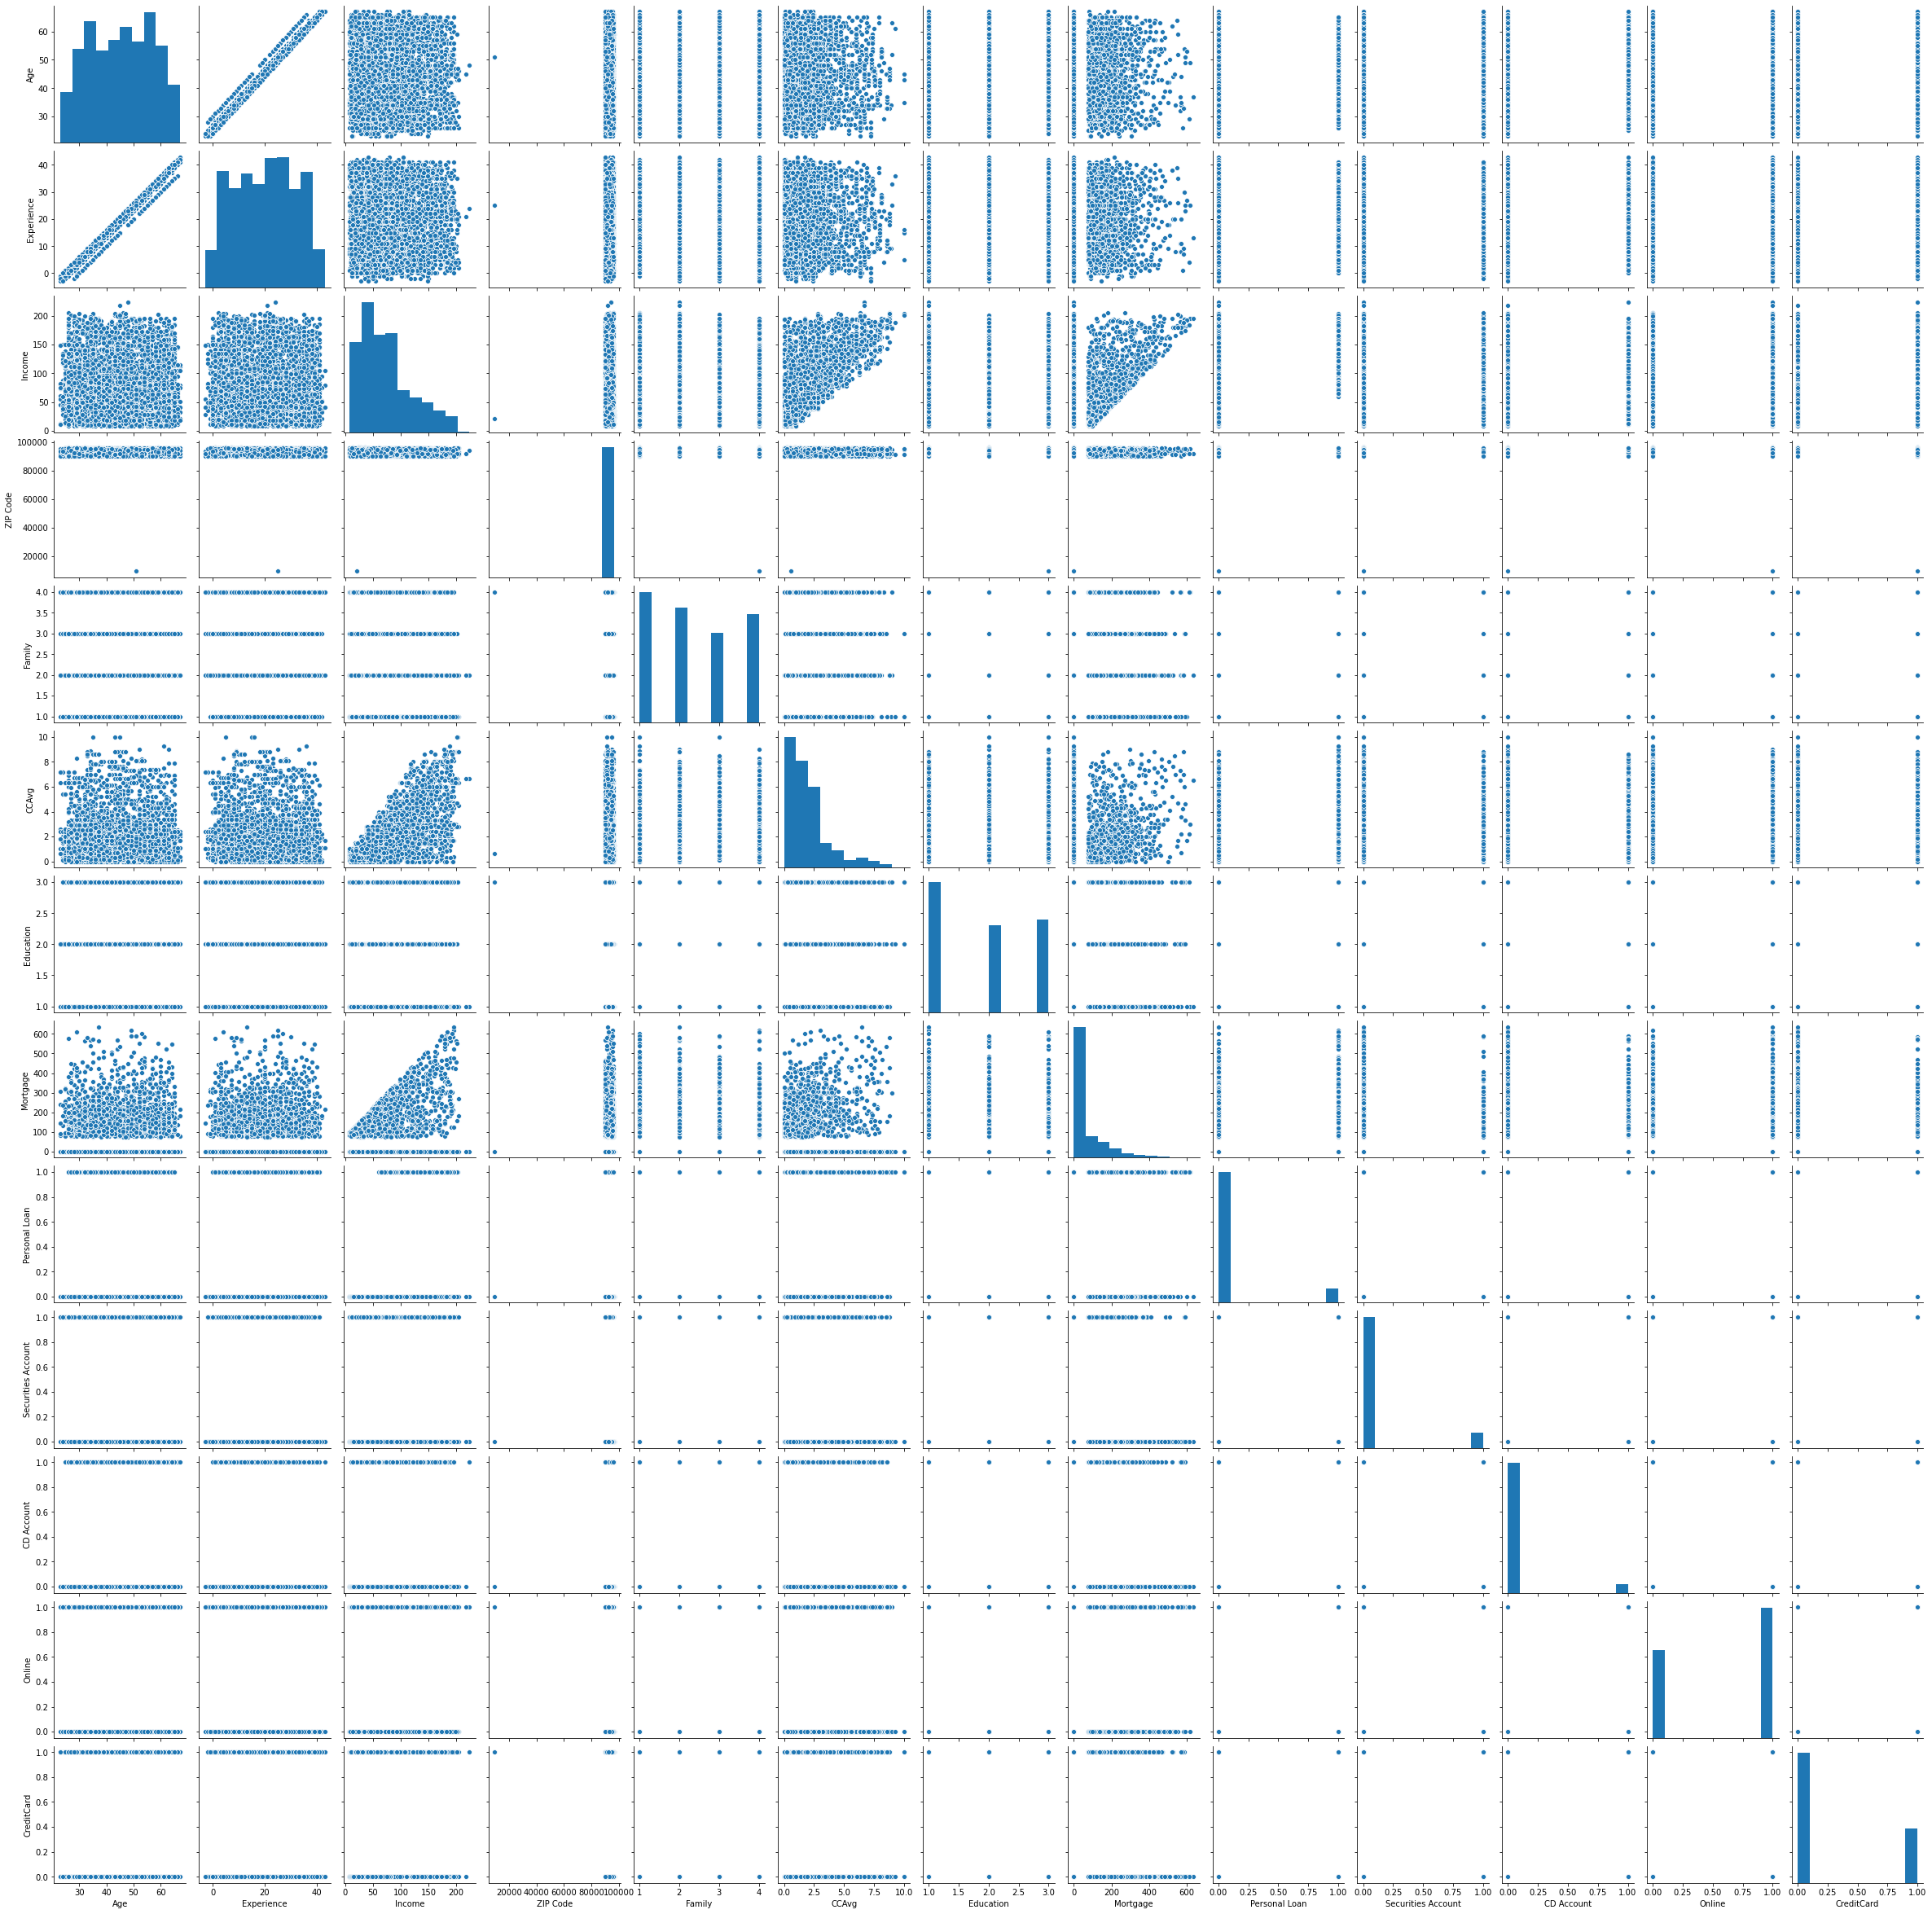

In [19]:
sns.pairplot(cr_df);

In [20]:
import pandas_profiling 
#Getting the pandas profiling report and check for incorrect imputation
pandas_profiling.ProfileReport(cr_df)

In [21]:
#Get data model ready

In [22]:
#Replacing the categorical variable with actual values
cr_df['Education'] = cr_df['Education'].replace({1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'})
cr_df.head(6)

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49     91107       4    1.6  Undergrad         0   
1   45          19      34     90089       3    1.5  Undergrad         0   
2   39          15      11     94720       1    1.0  Undergrad         0   
3   35           9     100     94112       1    2.7   Graduate         0   
4   35           8      45     91330       4    1.0   Graduate         0   
5   37          13      29     92121       4    0.4   Graduate       155   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
5              0                   0           0       1           0

In [23]:
#Creating dummies
cr_df = pd.get_dummies(cr_df, columns=['Education'])
cr_df.head(6)

Age  Experience  Income  ZIP Code  Family  CCAvg  Mortgage  Personal Loan  \
0   25           1      49     91107       4    1.6         0              0   
1   45          19      34     90089       3    1.5         0              0   
2   39          15      11     94720       1    1.0         0              0   
3   35           9     100     94112       1    2.7         0              0   
4   35           8      45     91330       4    1.0         0              0   
5   37          13      29     92121       4    0.4       155              0   

   Securities Account  CD Account  Online  CreditCard  \
0                   1           0       0           0   
1                   1           0       0           0   
2                   0           0       0           0   
3                   0           0       0           0   
4                   0           0       0           1   
5                   0           0       1           0   

   Education_Advanced/Professional  Education_Graduate  Education_Undergrad  
0                                0                   0                    1  
1                                0                   0                    1  
2                                0                   0                    1  
3                                0                   1                    0  
4                                0                   1                    0  
5                                0                   1                    0

In [24]:
#Count of incorrect Experience (Negative Experience)
cr_df[~cr_df['Experience'].gt(-1)]['Experience'].count()

52

In [25]:
cr_df.describe().transpose()

count          mean          std     min  \
Age                              5000.0     45.338400    11.463166    23.0   
Experience                       5000.0     20.104600    11.467954    -3.0   
Income                           5000.0     73.774200    46.033729     8.0   
ZIP Code                         5000.0  93152.503000  2121.852197  9307.0   
Family                           5000.0      2.396400     1.147663     1.0   
CCAvg                            5000.0      1.937938     1.747659     0.0   
Mortgage                         5000.0     56.498800   101.713802     0.0   
Personal Loan                    5000.0      0.096000     0.294621     0.0   
Securities Account               5000.0      0.104400     0.305809     0.0   
CD Account                       5000.0      0.060400     0.238250     0.0   
Online                           5000.0      0.596800     0.490589     0.0   
CreditCard                       5000.0      0.294000     0.455637     0.0   
Education_Advanced/Professional  5000.0      0.300200     0.458391     0.0   
Education_Graduate               5000.0      0.280600     0.449337     0.0   
Education_Undergrad              5000.0      0.419200     0.493478     0.0   

                                     25%      50%      75%      max  
Age                                 35.0     45.0     55.0     67.0  
Experience                          10.0     20.0     30.0     43.0  
Income                              39.0     64.0     98.0    224.0  
ZIP Code                         91911.0  93437.0  94608.0  96651.0  
Family                               1.0      2.0      3.0      4.0  
CCAvg                                0.7      1.5      2.5     10.0  
Mortgage                             0.0      0.0    101.0    635.0  
Personal Loan                        0.0      0.0      0.0      1.0  
Securities Account                   0.0      0.0      0.0      1.0  
CD Account                           0.0      0.0      0.0      1.0  
Online                               0.0      1.0      1.0      1.0  
CreditCard                           0.0      0.0      1.0      1.0  
Education_Advanced/Professional      0.0      0.0      1.0      1.0  
Education_Graduate                   0.0      0.0      1.0      1.0  
Education_Undergrad                  0.0      0.0      1.0      1.0

In [26]:
# Make Experience as 0 when it is less than or equal to -1
for i in list(cr_df[~cr_df['Experience'].gt(-1)]['Experience'].index):
# # this would give row numbers of places where Experinece is less than or equal to -1
     cr_df.loc[i,'Experience'] = 0  

In [27]:
#Check for Negative Experience after change
cr_df[~cr_df['Experience'].gt(-1)]['Experience'].count() 

0

In [28]:
#statistical summary again
cr_df.describe().transpose()

count          mean          std     min  \
Age                              5000.0     45.338400    11.463166    23.0   
Experience                       5000.0     20.119600    11.440484     0.0   
Income                           5000.0     73.774200    46.033729     8.0   
ZIP Code                         5000.0  93152.503000  2121.852197  9307.0   
Family                           5000.0      2.396400     1.147663     1.0   
CCAvg                            5000.0      1.937938     1.747659     0.0   
Mortgage                         5000.0     56.498800   101.713802     0.0   
Personal Loan                    5000.0      0.096000     0.294621     0.0   
Securities Account               5000.0      0.104400     0.305809     0.0   
CD Account                       5000.0      0.060400     0.238250     0.0   
Online                           5000.0      0.596800     0.490589     0.0   
CreditCard                       5000.0      0.294000     0.455637     0.0   
Education_Advanced/Professional  5000.0      0.300200     0.458391     0.0   
Education_Graduate               5000.0      0.280600     0.449337     0.0   
Education_Undergrad              5000.0      0.419200     0.493478     0.0   

                                     25%      50%      75%      max  
Age                                 35.0     45.0     55.0     67.0  
Experience                          10.0     20.0     30.0     43.0  
Income                              39.0     64.0     98.0    224.0  
ZIP Code                         91911.0  93437.0  94608.0  96651.0  
Family                               1.0      2.0      3.0      4.0  
CCAvg                                0.7      1.5      2.5     10.0  
Mortgage                             0.0      0.0    101.0    635.0  
Personal Loan                        0.0      0.0      0.0      1.0  
Securities Account                   0.0      0.0      0.0      1.0  
CD Account                           0.0      0.0      0.0      1.0  
Online                               0.0      1.0      1.0      1.0  
CreditCard                           0.0      0.0      1.0      1.0  
Education_Advanced/Professional      0.0      0.0      1.0      1.0  
Education_Graduate                   0.0      0.0      1.0      1.0  
Education_Undergrad                  0.0      0.0      1.0      1.0

#3 Split the data into training and test set in the ratio of 70:30 respectively

In [29]:
## Define X and Y variables
X = cr_df.drop('Personal Loan',axis=1)     # Predictor feature columns (14 X m)
Y = cr_df['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

##Split into training and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

#Training Data
x_train.head()

Age  Experience  Income  ZIP Code  Family  CCAvg  Mortgage  \
1334   47          22      35     94304       2    1.3         0   
4768   38          14      39     93118       1    2.0         0   
65     59          35     131     91360       1    3.8         0   
177    29           3      65     94132       4    1.8       244   
4489   39          13      21     95518       3    0.2         0   

      Securities Account  CD Account  Online  CreditCard  \
1334                   0           0       1           0   
4768                   0           0       1           0   
65                     0           0       1           1   
177                    0           0       0           0   
4489                   0           0       1           0   

      Education_Advanced/Professional  Education_Graduate  Education_Undergrad  
1334                                0                   0                    1  
4768                                0                   1                    0  
65                                  0                   0                    1  
177                                 0                   1                    0  
4489                                0                   1                    0

In [30]:
#Testing Data
x_test.head()

Age  Experience  Income  ZIP Code  Family  CCAvg  Mortgage  \
2764   31           5      84     91320       1    2.9       105   
4767   35           9      45     90639       3    0.9       101   
3814   34           9      35     94304       3    1.3         0   
3499   49          23     114     94550       1    0.3       286   
2735   36          12      70     92131       3    2.6       165   

      Securities Account  CD Account  Online  CreditCard  \
2764                   0           0       0           1   
4767                   1           0       0           0   
3814                   0           0       0           0   
3499                   0           0       1           0   
2735                   0           0       1           0   

      Education_Advanced/Professional  Education_Graduate  Education_Undergrad  
2764                                1                   0                    0  
4767                                0                   0                    1  
3814                                0                   0                    1  
3499                                0                   0                    1  
2735                                0                   1                    0

In [31]:
print('Shape of Training Data', x_train.shape)
print('Shape of Testing Data', x_test.shape)

Shape of Training Data (3500, 14)
Shape of Testing Data (1500, 14)


In [32]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(cr_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(cr_df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [33]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(cr_df.loc[cr_df['Personal Loan'] == 1]), (len(cr_df.loc[cr_df['Personal Loan'] == 1])/len(cr_df.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(cr_df.loc[cr_df['Personal Loan'] == 0]), (len(cr_df.loc[cr_df['Personal Loan'] == 0])/len(cr_df.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



#4 Logistic Regression

In [34]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3        4         5         6  \
0 -0.000482 -0.002429  0.036037 -0.000065  0.01637  0.010121  0.000836   

          7         8         9        10        11        12        13  \
0  0.000577  0.005045 -0.000192 -0.000073  0.006014  0.005839 -0.011967   

   intercept  
0  -0.000114  


In [35]:
#Evaluate Training model
Train_model_score = model.score(x_train, y_train)
print(Train_model_score)

0.9091428571428571


In [36]:
#Evaluate Testing model
Test_model_score = model.score(x_test, y_test)
print(Test_model_score)

0.9073333333333333


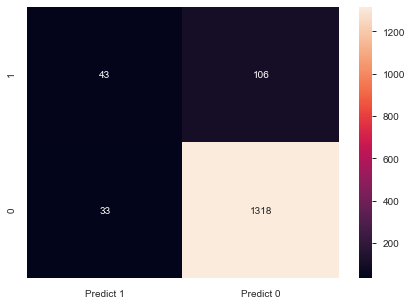

In [37]:
#Confusion Matrics
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))

#Confusion Matrics - Heat map
sns.heatmap(df_cm, annot=True,  fmt='.0f')

In [38]:
#Confusion Matrics
print(cm)

[[  43  106]
 [  33 1318]]


In [39]:
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Recall: 0.28859060402684567

Precision: 0.5657894736842105

F1 Score: 0.38222222222222224

Roc Auc Score: 0.632082126587812


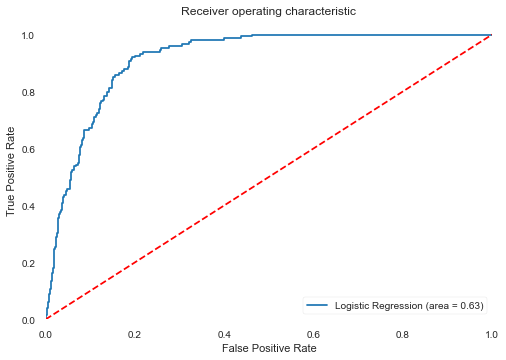

In [40]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#5 Give your reasoning on how can the model perform better

In [41]:
# Checking Parameters of logistic regression
model.get_params()

#If we dont specify the parameters in the model it takes default value

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [42]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=1,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print('Solver : ', solver)
print()
print('Training Score : ', train_score)
print()
print('Testing Score : ', test_score)

Solver :  ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

Training Score :  [0.959, 0.908, 0.909, 0.905, 0.905]

Testing Score :  [0.96, 0.908, 0.907, 0.901, 0.901]


In [43]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=1,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print('Solver : ', solver)
print()
print('Training Score : ', train_score)
print()
print('Testing Score : ', test_score)

Solver :  ['liblinear', 'saga']

Training Score :  [0.959, 0.905]

Testing Score :  [0.961, 0.901]


In [44]:
## Highest accuracy is same 'l1' with 'liblinear' and 'l2' with 'newton-cg'

In [45]:
model = LogisticRegression(random_state=1,penalty='l1',solver='liblinear',class_weight='balanced')

model.fit(x_train, y_train) 

y_predict = model.predict(x_test)     

print("Training accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))

Training accuracy 0.908

Testing accuracy 0.904


In [46]:
model = LogisticRegression(random_state=1,penalty='l1',solver='liblinear') # removing class weight to balanced

model.fit(x_train, y_train) 

y_predict = model.predict(x_test)     

print("Training accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))

Training accuracy 0.9588571428571429

Testing accuracy 0.9593333333333334


In [47]:
## Testing accuracy increased and model is not overfit, removing class weight as balanced from the model

In [48]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.2,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=1,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(x_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop

print(C)
print()
print(train_score)
print()
print(test_score)


[0.01, 0.1, 0.2, 0.25, 0.5, 0.75, 1]

[0.88, 0.906, 0.908, 0.907, 0.908, 0.908, 0.908]

[0.877, 0.908, 0.908, 0.907, 0.905, 0.904, 0.904]


In [49]:
## Best testing accuracy is obtained for C=0.2

In [50]:
#Therefore final model is
model = LogisticRegression(random_state=1,penalty='l1', solver='liblinear', C=0.2) 
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()


Trainig accuracy 0.9582857142857143

Testing accuracy 0.958



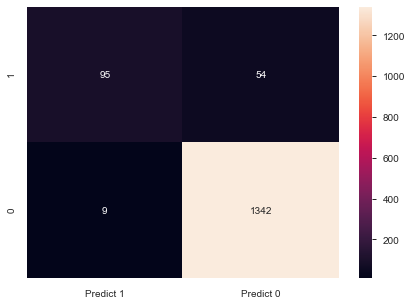

In [51]:
#Confusion Matrics
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))

#Confusion Matrics - Heat map
sns.heatmap(df_cm, annot=True,  fmt='.0f')

In [52]:
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))


Recall: 0.6375838926174496

Precision: 0.9134615384615384

F1 Score: 0.7509881422924901

Roc Auc Score: 0.8154610802835582


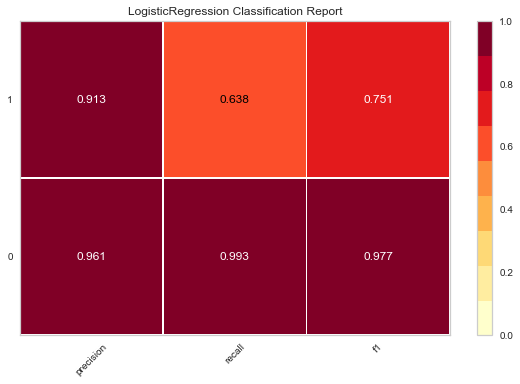

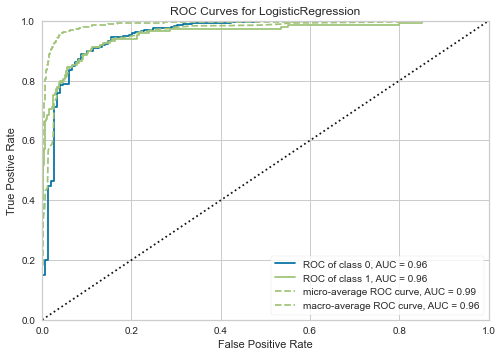

In [53]:
# Additional

from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

#6 Give Business understanding of your model

In [54]:
print('The confusion matrix \n\n')

print('True Positives (TP): we correctly predicted that they will take personal loan ', cm[0,0],'\n')

print('True Negatives (TN): we correctly predicted that they don''t take personal loan ', cm[1,1],'\n')

print('False Positives (FP): we incorrectly predicted that they will take personal loan (a "Type I error") ',cm[0,1] ,' Falsely predict positive Type I error \n')

print('False Negatives (FN): we incorrectly predicted that they don''t take personal loan (a "Type II error") ',cm[1,0],' Falsely predict negative Type II error \n')

The confusion matrix 


True Positives (TP): we correctly predicted that they will take personal loan  95 

True Negatives (TN): we correctly predicted that they dont take personal loan  1342 

False Positives (FP): we incorrectly predicted that they will take personal loan (a "Type I error")  54  Falsely predict positive Type I error 

False Negatives (FN): we incorrectly predicted that they dont take personal loan (a "Type II error")  9  Falsely predict negative Type II error 

